We will choose the number of neighbors as 10 for knn. If you recall from the last module, for Synergix, k=10 will give us a model closer to a good-fit model. Rest of the code remains the same so will quickly execute all the cells.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [192]:
#changing the work directory
os.chdir('/Users/admin/Desktop/Synergyx Dataset')

In [2]:
#reading the data
data = pd.read_csv('Synergix_data_preprocessed_new.csv')
data.head()

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
1,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
2,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
4,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


In [3]:
#drop Units_sold column
data.drop(columns = 'Units_sold', axis = 1, inplace = True)

In [4]:
#check the data
data.head()

,Page_traffic,Unit_price,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,5835.0,22.214389,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,6.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
1,1881.0,11.870778,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,8.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
2,2477.0,27.645714,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,7.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3,4087.0,16.896848,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,7.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
4,1446.0,16.357664,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,8.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


In [5]:
#Storing the ratio in a list named Rating_ratio
Rating_ratio = []
for row in data.values:
    if(row[3]+row[4] == 0):
        if(row[6]+row[7] == 0):
            #If all the ratings are zero then overall rating ratio will also be zero
            Rating_ratio.append(0.0)
        else:
            #If only the numerator(1 and 2 star) ratings are zero then add -99999 to the list temporarily which 
            #will be taken care of in the next part of the code
            Rating_ratio.append(-99999)
    else:
        Rating_ratio.append((int(row[6])+int(row[7]))/(int(row[4])+int(row[3])));
              

#replacing -99999 with the maximum rating in the list
max_rating = max(Rating_ratio)
for x in range(len(Rating_ratio)):
    if(Rating_ratio[x] == -99999):
        Rating_ratio[x] = max_rating

In [6]:
#adding the column 'Good_By_Bad_Rating' to the dataframe
data['Good_By_Bad_Rating'] = Rating_ratio

In [7]:
#drop the rating columns
data.drop(columns = ['1_Star_Rating', '2_Star_Rating', '3_Star_Rating', '4_Star_Rating', '5_Star_Rating'], inplace = True)

In [8]:
#check the dataset
data.head().transpose()

,0,1,2,3,4
Page_traffic,5835.0,1881.0,2477.0,4087.0,1446.0
Unit_price,22.214389,11.870778,27.645714,16.896848,16.357664
Segment,Skincare,Skincare,Makeup,Makeup,Hair Care
Image_Count,6.0,9.0,10.0,5.0,0.0
Bullet_Count,6.0,8.0,7.0,7.0,8.0
Title_Count,89.0,126.0,152.0,117.0,165.0
Description_Length,141.0,149.0,186.0,209.0,158.0
num_unique_Search_Terms,3.0,13.0,4.0,7.0,4.0
Organic Search Rank,3.0,16.0,20.0,20.0,16.0
Num_of_Promotions,0.0,0.0,0.0,0.0,0.0


In [9]:
#get the category names
data['Segment'].unique()

array(['Skincare', 'Makeup', 'Hair Care'], dtype=object)

## One-hot Encoding

In [10]:
#one-hot encoding
data = pd.get_dummies(data, columns = ['Segment'], prefix = 'Segment', drop_first = True)
data.head()

,Page_traffic,Unit_price,Image_Count,Bullet_Count,Title_Count,Description_Length,num_unique_Search_Terms,Organic Search Rank,Num_of_Promotions,Sum of Spend,...,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000,Good_By_Bad_Rating,Segment_Makeup,Segment_Skincare
0,5835.0,22.214389,6.0,6.0,89.0,141.0,3.0,3.0,0.0,0.0,...,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1,21.783626,False,True
1,1881.0,11.870778,9.0,8.0,126.0,149.0,13.0,16.0,0.0,0.0,...,75868.0,2.0,0.0,0.00,0.0,0.0,0,18.397906,False,True
2,2477.0,27.645714,10.0,7.0,152.0,186.0,4.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0,20.274611,True,False
3,4087.0,16.896848,5.0,7.0,117.0,209.0,7.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,1,16.171233,True,False
4,1446.0,16.357664,0.0,8.0,165.0,158.0,4.0,16.0,0.0,0.0,...,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0,26.811321,False,False


<h2>Performing Train Test Split</h2>

In [11]:
#Separating the independent and target variables
y = data['Units_sold>1000']
X = data.drop(columns = ['Units_sold>1000'], axis = 1)

In [12]:
#Quick look at the shape of the data
X.shape, y.shape

((19631, 21), (19631,))

In [13]:
#import train test split
from sklearn.model_selection import train_test_split

In [14]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
#A quick look at the shape of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13741, 21), (5890, 21), (13741,), (5890,))

<h2>Feature Scaling</h2>

In [16]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

In [17]:
#create an instance for StandardScaler
scaler = StandardScaler()

In [18]:
#let's transform the train data
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
#check X_train_scaled
X_train_scaled

array([[ 9.90904284e-04,  4.21592655e-01,  8.49091590e-01, ...,
        -3.73875717e-02,  9.18120514e-01, -6.87701870e-01],
       [ 3.12135911e-01,  9.81193880e-02,  2.35826542e-01, ...,
        -1.02098342e+00,  9.18120514e-01, -6.87701870e-01],
       [-3.87111076e-01,  5.35315189e-01,  4.40248225e-01, ...,
        -5.48287256e-01,  9.18120514e-01, -6.87701870e-01],
       ...,
       [-3.40008100e-01,  1.63678075e-01, -1.39954692e+00, ...,
        -2.47040728e-01,  9.18120514e-01, -6.87701870e-01],
       [-1.19184219e+00,  4.38805436e-01,  4.40248225e-01, ...,
        -1.48075135e+00,  9.18120514e-01, -6.87701870e-01],
       [-1.91298211e+00,  2.89487459e+00,  6.44669908e-01, ...,
         4.19829879e-01, -1.08918163e+00,  1.45411848e+00]])

In [20]:
X_train_scaled.shape

(13741, 21)

In [21]:
X_test_scaled = scaler.transform(X_test)

In [22]:
X_test_scaled

array([[ 0.89130348,  0.60472504,  0.44024822, ..., -1.48075135,
        -1.08918163,  1.45411848],
       [-0.20732366, -0.15943628, -1.39954692, ..., -1.48075135,
         0.91812051, -0.68770187],
       [-1.57861733,  0.45159198, -1.39954692, ...,  0.57902643,
        -1.08918163, -0.68770187],
       ...,
       [-0.73341746,  0.49783078,  0.23582654, ..., -0.05769711,
         0.91812051, -0.68770187],
       [-0.90988776,  0.25377995,  0.64466991, ...,  1.46788558,
         0.91812051, -0.68770187],
       [ 3.0388011 , -0.58786969,  0.03140486, ..., -1.48075135,
         0.91812051, -0.68770187]])

<h2>KNN Model</h2>

In [23]:
#import the necessary class
from sklearn.neighbors import KNeighborsClassifier

In [24]:
#setting the value k or neighbors at 10 to choose one of the goodfit model
knn_model = KNeighborsClassifier(10)

In [25]:
#training the knn model with train data
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
#making predictions on the same training data
y_train_pred = knn_model.predict(X_train_scaled)

In [27]:
#making predictions on the test data based on the learniing from fitting model on the train data
y_pred = knn_model.predict(X_test_scaled)

# Video 1.1 - Confusion Matrix and Accuracy

<p style = 'color:green'><b>Run all the cells above before you begin</b><p>

In [33]:
#import confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
# Generate the confusion matrix for train data
train_cm = confusion_matrix(y_train, y_train_pred)

print("Confusion Matrix for Train Set:")
print(train_cm)

Confusion Matrix for Train Set:
[[4488  952]
 [ 970 7331]]


In our case, when we create the confusion matrix for train data - 
- True Negative is 4488
- False Positive is 952
- False Negative is 970 and 
- True Positive is 7331

In [35]:
# Generate the confusion matrix for test data
test_cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for Test Set:")
print(test_cm)


Confusion Matrix for Test Set:
[[1813  541]
 [ 487 3049]]


And for our test case- 
- True Negative is 1813
- False Positive is 541
- False Negative is 487 and 
- True Positive is 3049

Accuracy is nothing but the number of correct predictions devided by the total number of predictions. As we discussed, the number of correct predictions are True Positive + True Negative.

So, in terms of confusion matrix, accuracy is the sum of True Positive and True Negatives divided by the total number of predictions.

![Image Description](Equation_Accuracy.png)

In [36]:
accuracy_score(y_train, y_train_pred)

0.8601266283385489

In [38]:
accuracy_score(y_test, y_pred)

0.8254668930390492

# Video 1.2 - Precision, Recall and F1 Score

<p style = 'color:green'><b>Run all the cells above before you begin</b><p>

## Precision

In [39]:
#calculating precision on train set
from sklearn.metrics import precision_score
train_precision = precision_score(y_train, y_train_pred)
print(train_precision)

0.885065797416395


In [40]:
#calculating precision on test set
test_precision = precision_score(y_test, y_pred)
print(test_precision)

0.8493036211699164


## Recall 

In [41]:
#calculating recall on train set
from sklearn.metrics import recall_score
train_recall = recall_score(y_train, y_train_pred)
print(train_recall)

0.8831466088423081


In [42]:
#calculating recall on test set
test_recall = recall_score(y_test, y_pred)
print(test_recall)

0.8622737556561086


## F1 Score

In [43]:
#calculating f1_score on train set
from sklearn.metrics import f1_score
train_f1 = f1_score(y_train, y_train_pred)
print(train_f1)

0.8841051616015436


In [44]:
#calculating precision on test set
test_f1 = f1_score(y_test, y_pred)
print(test_f1)

0.8557395453269716


In [45]:
#create classification for train set
from sklearn.metrics import classification_report
train_classification_report = classification_report(y_train, y_train_pred)
print(train_classification_report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      5440
           1       0.89      0.88      0.88      8301

    accuracy                           0.86     13741
   macro avg       0.85      0.85      0.85     13741
weighted avg       0.86      0.86      0.86     13741



In [46]:
#create classification for test set
from sklearn.metrics import classification_report
test_classification_report = classification_report(y_test, y_pred)
print(test_classification_report)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2354
           1       0.85      0.86      0.86      3536

    accuracy                           0.83      5890
   macro avg       0.82      0.82      0.82      5890
weighted avg       0.82      0.83      0.83      5890



Again as a reminder, when we were individually finding the values of precison, recall and f1 score, it showed us the results for class "1". This is by convention. In the classification report we get these metrics for both the classes.

As for the Macro Avg, it is the average precision, recall, and F1 score between classes. 

Similarly, the Weighted Avg is the precision, recall, and F1 score of the two classes, where weight is given by the supprt.

In [47]:
knn_model.predict_proba(X_test_scaled)[:, 1]

array([0.9, 0.9, 0. , ..., 0.7, 0.2, 1. ])

This function gives us the probabilities of each sample belonging to class 1. Let sunderstand how probabability predictions are calculated for KNN. If you remember in knn if 9 neighbors for a sample belong to class 1 and one neighbor belongs to class 0, the new datapoint will belong to class 1. The probability of this can be calculated as 9/10. If a sample has a probability of > 0.5, it can be said to belongs to class 1, otherwise it belongs to class 0.

One practical reason is that it is right in the middle. Another reason is if we change the threshold, we will have to choose different values of threshold and then comparing models across these thresholds will become a cumbersome exercise. 

# Video 1.3 - AUC-ROC

<p style = 'color:green'><b>Run all the cells above before you begin</b><p>

In [48]:
#calculating AUC-ROC on train set
from sklearn.metrics import roc_curve, auc

In [49]:
#calculating AUC-ROC on test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
test_roc_auc = auc(test_fpr, test_tpr)
print(test_roc_auc)

0.8931472423947685


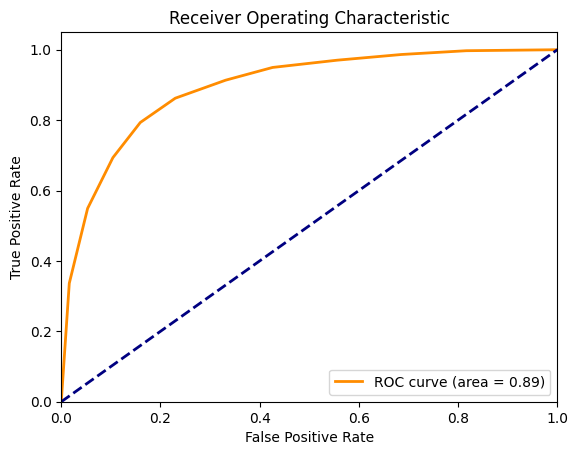

In [50]:
#visualizing AUC-ROC on test set
plt.figure()
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [51]:
#setting the value k or neighbors at 10 to choose one of the goodfit model
knn_model_50 = KNeighborsClassifier(50)
#training the knn model with train data
knn_model_50.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=50)

In [52]:
test_fpr_50, test_tpr_50, test_thresholds_50 = roc_curve(y_test, knn_model_50.predict_proba(X_test_scaled)[:, 1])
test_roc_auc_50 = auc(test_fpr_50, test_tpr_50)

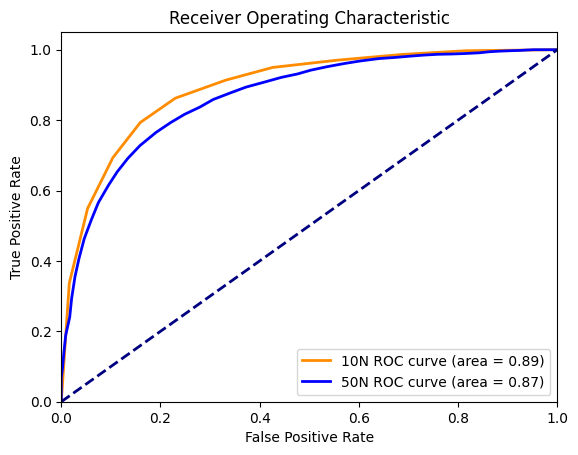

In [53]:
#visualizing AUC-ROC on test set
plt.figure()
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label='10N ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot(test_fpr_50, test_tpr_50, color='blue', lw=2, label='50N ROC curve (area = %0.2f)' % test_roc_auc_50)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

As we can see the area under the curve of 10 neighbors model is slightly bigger than the are of model with 50 neighbors. This is also evident in the scores. So we can conclude that the 10 neighbor model is beter than the 50 neighbor model across various thresholds.

You may be wondering why we have not chosen AUC as the final metric. One drawback of this metric is that it is not suitable to comapre all ML models as only a few of them give out continuos probability scores. We will be trying various ML models throughout this course. This metric will not be suitable to compare those models.